In [1]:
import tweepy       # python wrapper for twitter api
import json
import time
import requests
# step 0, get your own twitter credentials!

In [2]:
# this is my own personal twitter api information
# if you could be so kind as to sign up yourself on both twitter and mashape that'd be great :)
# It's FREEEEEEE
api_key = 'g5uPIpw80nULQI1gfklv2zrh4'
api_secret = 'cOWvNWxYvPmEZ0ArZVeeVVvJu41QYHdUS2GpqIKtSQ1isd5PJy'
access_token = '49722956-TWl8J0aAS6KTdcbz3ppZ7NfqZEmrwmbsb9cYPNELG'
access_secret = '3eqrVssF3ppv23qyflyAto8wLEiYRA8sXEPSghuOJWTub'

In [3]:
# Documentation is your friend! http://docs.tweepy.org/en/v3.1.0/
auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth) # returns a tweepy authorization handler object

## 1. Use Twitter API to stream and store tweets

In [4]:
# 1. Use Twitter API to stream and store tweets (300 per candidate)
# 37.781157,-122.39872 is the lat,lng for SF
hilary_tweets = api.search(q='#ImWithHer', count=100, geocode="37.781157,-122.398720,10mi") + api.search(q='#hillaryclinton', count=100, geocode="37.781157,-122.398720,50mi") + api.search(q='#hillary2016', count=100, geocode="37.781157,-122.398720,50mi")
the_donald_tweets = api.search(q='#donaldtrump', count=100, geocode="37.781157,-122.398720,10mi") + api.search(q='#trump2016', count=100, geocode="37.781157,-122.398720,50mi") + api.search(q='#trump', count=100, geocode="37.781157,-122.398720,50mi") + api.search(q='#makeamericagreatagain', count=100, geocode="37.781157,-122.398720,50mi")

In [5]:
the_donald_tweets[0].text

u"And unlike Lyin' #TedCruz, @JohnKasich &amp; @JebBush won't cave to pressure #DonaldTrump #NeverTrump https://t.co/9NBkDEgwRl"

In [6]:
hilary_tweets[0].text

u'RT @shawnbric: News that #Trump brought Santorum on his team... Another excuse to use this gif! #LGBT: Begone, homophobes! #ImWithHer #Xmen\u2026'

In [7]:
# wrappers come with built in python attributes and methods!
print dir(the_donald_tweets[0])

['__class__', '__delattr__', '__dict__', '__doc__', '__eq__', '__format__', '__getattribute__', '__getstate__', '__hash__', '__init__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'metadata', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'quoted_status', 'quoted_status_id', 'quoted_status_id_str', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [8]:
print the_donald_tweets[0].created_at
print the_donald_tweets[0].text
print the_donald_tweets[0].favorite_count
print the_donald_tweets[0].favorited
print the_donald_tweets[0].lang
print the_donald_tweets[0].geo
print the_donald_tweets[0].retweet_count
print the_donald_tweets[0].retweeted
print the_donald_tweets[0].coordinates

2016-09-23 19:11:29
And unlike Lyin' #TedCruz, @JohnKasich &amp; @JebBush won't cave to pressure #DonaldTrump #NeverTrump https://t.co/9NBkDEgwRl
0
False
en
None
0
False
None


In [9]:
# modify the tweets to make a nice dictionary
def parse_status_objects(tweet_list):
    modified_tweets = list()
    for x in tweet_list:
        modified_tweets.append( [
                    x.created_at,
                    x.text,
                    x.favorite_count,
                    x.favorited,
                    x.lang,
                    x.geo,
                    x.retweet_count,
                    x.retweeted,
                    x.coordinates
                ])
    return modified_tweets
        
hilary_tweets = parse_status_objects(hilary_tweets)
the_donald_tweets = parse_status_objects(the_donald_tweets)

In [10]:
print the_donald_tweets[0]
print hilary_tweets[0]

[datetime.datetime(2016, 9, 23, 19, 11, 29), u"And unlike Lyin' #TedCruz, @JohnKasich &amp; @JebBush won't cave to pressure #DonaldTrump #NeverTrump https://t.co/9NBkDEgwRl", 0, False, u'en', None, 0, False, None]
[datetime.datetime(2016, 9, 23, 18, 52, 22), u'RT @shawnbric: News that #Trump brought Santorum on his team... Another excuse to use this gif! #LGBT: Begone, homophobes! #ImWithHer #Xmen\u2026', 0, False, u'en', None, 1, False, None]


In [26]:
len(the_donald_tweets)

311

In [27]:
len(hilary_tweets)

293

## 2. Create a dataframe that combines all of the tweets from each candidate

In [15]:
# 2 Create a dataframe that combines all of the tweets from each candidate
# To do so, you will need to concat the data frames
# so each row is a tweet and your columns should be 
# date, text, favorite_count, favorited, language, geocode, retweet count, retweeted, coordinates

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
feature_cols =['date', 'text', 'favorite_count', 'favorited', 'language', 'geocode', 'retweet_count', 
               'retweeted', 'coordinates']
tweets = pd.DataFrame(the_donald_tweets + hilary_tweets, columns=feature_cols)
tweets.head()

,date,text,favorite_count,favorited,language,geocode,retweet_count,retweeted,coordinates
0,2016-09-23 19:11:29,"And unlike Lyin' #TedCruz, @JohnKasich &amp; @...",0,False,en,None,0,False,None
1,2016-09-23 18:48:20,RT @BruceMirken: #DonaldTrump fortifies anti-#...,0,False,en,None,1,False,None
2,2016-09-23 18:34:44,Not so stunning Before #DonaldTrump attacked #...,0,False,en,None,0,False,None
3,2016-09-23 18:12:51,RT @tigerbeat: How #DonaldTrump got his start ...,0,False,en,None,1,False,None
4,2016-09-23 18:11:45,How #DonaldTrump got his start bc of Daddy htt...,0,False,en,None,1,False,None


In [29]:
tweets.shape

(604, 9)

## 3. Create a function to take in a string and output the textblob sentiment of that string

In [ ]:
# 3 Create a function to take in a string and output the textblob sentiment of that string

In [30]:
from textblob import TextBlob

In [31]:
def detect_sentiment(text):
    return TextBlob(text).sentiment.polarity

## 4. Add a column to your data frame called 'sentiment'

In [ ]:
# 4 Add a column to your data frame called 'sentiment'
# which holds the sentiment of that tweet (hint: use the function from #3)

In [32]:
tweets['sentiment'] = tweets.text.apply(detect_sentiment)

In [33]:
tweets.head()

,date,text,favorite_count,favorited,language,geocode,retweet_count,retweeted,coordinates,sentiment
0,2016-09-23 19:11:29,"And unlike Lyin' #TedCruz, @JohnKasich &amp; @...",0,False,en,None,0,False,None,0.0
1,2016-09-23 18:48:20,RT @BruceMirken: #DonaldTrump fortifies anti-#...,0,False,en,None,1,False,None,0.0
2,2016-09-23 18:34:44,Not so stunning Before #DonaldTrump attacked #...,0,False,en,None,0,False,None,0.5
3,2016-09-23 18:12:51,RT @tigerbeat: How #DonaldTrump got his start ...,0,False,en,None,1,False,None,0.0
4,2016-09-23 18:11:45,How #DonaldTrump got his start bc of Daddy htt...,0,False,en,None,1,False,None,0.0


## 5. create a word count column

In [ ]:
# 5 create a word count column, which holds the number of words in the text column

In [36]:
tweets['word_count'] = tweets.text.str.split().apply(len)
tweets.head()

,date,text,favorite_count,favorited,language,geocode,retweet_count,retweeted,coordinates,sentiment,word_count
0,2016-09-23 19:11:29,"And unlike Lyin' #TedCruz, @JohnKasich &amp; @...",0,False,en,None,0,False,None,0.0,14
1,2016-09-23 18:48:20,RT @BruceMirken: #DonaldTrump fortifies anti-#...,0,False,en,None,1,False,None,0.0,17
2,2016-09-23 18:34:44,Not so stunning Before #DonaldTrump attacked #...,0,False,en,None,0,False,None,0.5,18
3,2016-09-23 18:12:51,RT @tigerbeat: How #DonaldTrump got his start ...,0,False,en,None,1,False,None,0.0,18
4,2016-09-23 18:11:45,How #DonaldTrump got his start bc of Daddy htt...,0,False,en,None,1,False,None,0.0,16


In [37]:
tweets.text[0]

u"And unlike Lyin' #TedCruz, @JohnKasich &amp; @JebBush won't cave to pressure #DonaldTrump #NeverTrump https://t.co/9NBkDEgwRl"

In [ ]:
# use countvectorizer to create a document-term matrix and concatinate it to your main dataframe
#(hint you should now have thousands of columns)
# Don't add count vectorizer result to the original dataframe

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

In [39]:
# use CountVectorizer to create document-term matrices
vect = CountVectorizer()
tweets_dtm = vect.fit_transform(tweets.text)
tweets_dtm.shape

(604, 2012)

In [54]:
vect.get_feature_names()

[u'00',
 u'000',
 u'00pm',
 u'06as31avyj',
 u'08o4bj72uw',
 u'09pmdkq9ww',
 u'0kcklxi019',
 u'0lxixcwdbc',
 u'0qsolfwm1b',
 u'0uw4ancvuu',
 u'0zum6gzc2h',
 u'10',
 u'100',
 u'1000',
 u'10m',
 u'11',
 u'110',
 u'116',
 u'120',
 u'13badny1jc',
 u'14gp9jrrgf',
 u'15',
 u'18sbkrgqtd',
 u'1962',
 u'1987',
 u'1991',
 u'1imbrub4t2',
 u'1kcms9ypda',
 u'2015',
 u'2016',
 u'2016election',
 u'2017',
 u'250k',
 u'26',
 u'2nd',
 u'2q0ye7oipp',
 u'2qljtsepog',
 u'3500',
 u'3dannyv',
 u'3ectif5wed',
 u'3efphw7tx3',
 u'3jlbjtydmk',
 u'3n2sjhyxkz',
 u'3svpboatf1',
 u'3vcv533yl0',
 u'3ytjiaekqi',
 u'4hillary',
 u'4kdhz7vomw',
 u'50',
 u'55iubdtgvf',
 u'5bzuaq6nhl',
 u'5nctrdmqjs',
 u'5qzffhkrdv',
 u'5tk92uksf6',
 u'5xvqbeard1',
 u'65',
 u'6jx6e5vlkj',
 u'6usbqecdzs',
 u'7eopcxmllw',
 u'7fi2xmdkly',
 u'7fw8d1mz7v',
 u'7j9q8hy4ay',
 u'7qy7uceirr',
 u'862arhisrc',
 u'8i8x4zvy7n',
 u'8qezrtj0un',
 u'8s50qm22kt',
 u'8sunelk1e9',
 u'8tzcb6kmcb',
 u'8vemsaqega',
 u'911',
 u'97zncpnscc',
 u'99',
 u'99owppo',
 u

In [55]:
dtm_df = pd.DataFrame(tweets_dtm.toarray(), columns=vect.get_feature_names())
dtm_df.shape

(604, 2012)

In [56]:
dtm_df.head()

,00,000,00pm,06as31avyj,08o4bj72uw,09pmdkq9ww,0kcklxi019,0lxixcwdbc,0qsolfwm1b,0uw4ancvuu,...,zachgalifianakis,zccc3fjbvj,zd3eieoint,zdh89mq6mt,zhif4lsk0j,zjbdtm92vh,zlwnritskv,zvp9ctftdy,zxcsx0jvqk,zxiqyi9gd6
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
tweets_dtm[0]

<1x2012 sparse matrix of type '<type 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>

In [60]:
# concatinate it to your main dataframe
tweets_with_dtm = pd.concat([tweets, dtm_df], axis=1)
tweets_with_dtm.head()

,date,text,favorite_count,favorited,language,geocode,retweet_count,retweeted,coordinates,sentiment,...,zachgalifianakis,zccc3fjbvj,zd3eieoint,zdh89mq6mt,zhif4lsk0j,zjbdtm92vh,zlwnritskv,zvp9ctftdy,zxcsx0jvqk,zxiqyi9gd6
0,2016-09-23 19:11:29,"And unlike Lyin' #TedCruz, @JohnKasich &amp; @...",0,False,en,None,0,False,None,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2016-09-23 18:48:20,RT @BruceMirken: #DonaldTrump fortifies anti-#...,0,False,en,None,1,False,None,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2016-09-23 18:34:44,Not so stunning Before #DonaldTrump attacked #...,0,False,en,None,0,False,None,0.5,...,0,0,0,0,1,0,0,0,0,0
3,2016-09-23 18:12:51,RT @tigerbeat: How #DonaldTrump got his start ...,0,False,en,None,1,False,None,0.0,...,0,0,0,0,0,0,0,0,0,0
4,2016-09-23 18:11:45,How #DonaldTrump got his start bc of Daddy htt...,0,False,en,None,1,False,None,0.0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
tweets_with_dtm.shape

(604, 2023)

## 6. Use kmean to create clusters for the dataframe

In [ ]:
# 6 Use kmean to create clusters for the dataframe (choose an optimal k)
# Don't add clusters to the original dataframe

In [ ]:
from sklearn.cluster import KMeans

Where was this discussed in class?

## 7. Explore the clusters

In [ ]:
# 7 Explore the clusters
# What is interesting? Surprising? Can you draw any inferences about each cluster?
# Write your answer to these questions in markdown

## 8. Create a column called 'democrat'

In [ ]:
# 8 Create a column called 'democrat' and assign it to the corresponding candidate name for all the records
# 1 for hilary and 0 for donald trump
# Make a boxplot of sentiment for each candidate by the "democrat" column

In [65]:
hilary_tweets_df = pd.DataFrame(hilary_tweets, columns=feature_cols)
hilary_tweets_df['sentiment'] = hilary_tweets_df.text.apply(detect_sentiment)
hilary_tweets_df['word_count'] = hilary_tweets_df.text.str.split().apply(len)
hilary_tweets_df['democrat'] = 1

donald_tweets_df = pd.DataFrame(the_donald_tweets, columns=feature_cols)
donald_tweets_df['sentiment'] = donald_tweets_df.text.apply(detect_sentiment)
donald_tweets_df['word_count'] = donald_tweets_df.text.str.split().apply(len)
donald_tweets_df['democrat'] = 0

tweets = pd.concat([hilary_tweets_df, donald_tweets_df])
tweets.head()

,date,text,favorite_count,favorited,language,geocode,retweet_count,retweeted,coordinates,sentiment,word_count,democrat
0,2016-09-23 18:52:22,RT @shawnbric: News that #Trump brought Santor...,0,False,en,None,1,False,None,-0.078125,21,1
1,2016-09-23 18:48:00,RT @JustJennaSlater: Watch. Listen. Learn. Vot...,0,False,en,None,1,False,None,0.000000,9,1
2,2016-09-23 18:47:25,Watch. Listen. Learn. Vote. #ImWithHer @Hillar...,1,False,en,None,1,False,None,0.000000,7,1
3,2016-09-23 18:42:12,RT @carlbass: Proud to stand with business lea...,0,False,en,None,3,False,None,0.525000,15,1
4,2016-09-23 18:32:14,"RT @SF4Hillary: Matt Bomer: ""This is the most ...",0,False,en,None,328,False,None,0.383333,21,1


In [66]:
tweets.tail()

,date,text,favorite_count,favorited,language,geocode,retweet_count,retweeted,coordinates,sentiment,word_count,democrat
306,2016-09-21 09:45:08,Ivanka trump #MakeAmericaGreatAgain https://t....,0,False,pl,None,0,False,None,0.0,4,0
307,2016-09-21 08:37:31,😂 just saying this sounds like a great idea @...,2,False,en,None,0,False,None,0.8,15,0
308,2016-09-21 03:17:50,#makeAmericagreatagain by kicking millions off...,1,False,en,None,1,False,None,0.0,6,0
309,2016-09-21 01:00:23,This is awesome! #MakeAmericaGreatAgain #Trump...,1,False,en,None,0,False,None,1.0,7,0
310,2016-09-21 00:09:41,#trumpacandy #trump #MakeAmericaGreatAgain #ma...,0,False,und,None,0,False,None,0.0,7,0


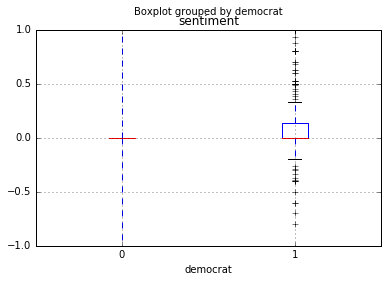

In [68]:
# Make a boxplot of sentiment for each candidate by the "democrat" column
import matplotlib.pyplot as plt
%matplotlib inline

tweets.boxplot(column='sentiment', by='democrat')

# Check. This does not look right. There's no box on the left.

## 9. Estimate classification models using knn and logistic regession.

In [ ]:
# 9 Estimate classification models using knn and logistic regession.  Dont forget to use cross validation 
    # (do not use cross_val_score because we will want a confusion matrix).
# The cateogrical response here is predict democrat or republican
# Your features can EITHER be your countvectorizer document term matrix OR 
# data from the original dataframe (sentiment, word count, etc)

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier

# knn = KNeighborsClassier

## 10. Initialize a classification model (for both knn and logistic)

In [ ]:
# 10 Initialize a classification model (for both knn and logistic)
# This is separate from step 9 because I will eventually want a 
# confusion matrix and we can't do that via cros validation

## 11. Split and Train

In [ ]:
# 11 Split your data into training and testing tests and then
# train your classification model  (for both knn and logistic)

## 12. Predict on your test features and targets

In [ ]:
# 12 Predict on your test features and targets (for both knn and logistic)

## 13. output your accuracy

In [ ]:
# 13 output your accuracy (for both knn and logistic)

## 14. Create a confusion matrix

In [ ]:
# 14 Create a confusion matrix for your predictions (for both knn and logistic)
# What is the sensitivity and specificity?

## 15. Who is the easiest candidate to predict?

In [ ]:
# 15 Who is the easiest candidate to predict? Why do you think? 
# Who is the hardest? Why do you think?
# Write your answers in markdown (for both knn and logistic)

## Bonus

In [ ]:
# 16 BONUS: make a pipeline with the first step being a feature union of countvectorizer
# and tfidfvectorizer and no other features and our second step is
# a ML model (your choice) predict our binary response


In [16]:
# 17: BONUS: grid search the model in step 16 to obtain the best features (up to you)

In [ ]:
# 18: SUPER BONUS: make a custom transformer that extracts sentiment and word count
# make a pipeline that combines countvec, tfidfvec and your custom transformer
# and try to get the possible accuracy for predicting whether or not the person is talking
# about democrats or republicans